# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from keras import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/mohseen/opt/anaconda3/envs/tf_cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Load the dataset

In [40]:
data = pd.read_csv('Fish_Dataset.csv')

In [41]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Data Preprocessing

In [42]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

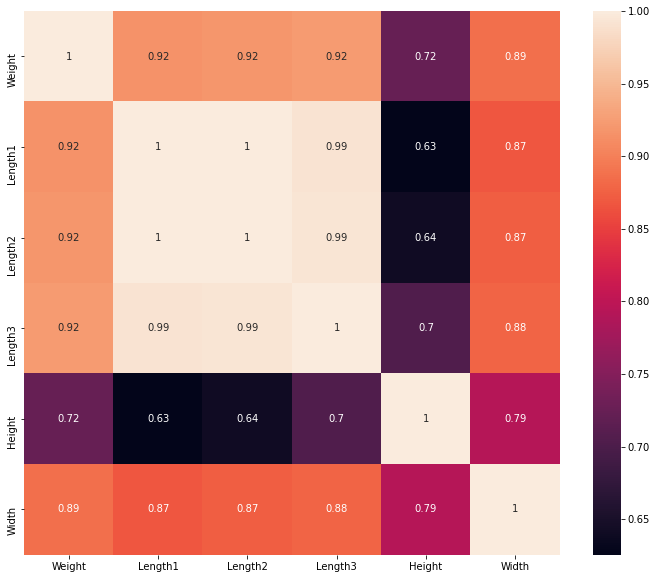

In [43]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [44]:
# Check for the number of species
len(data['Species'].unique())

7

In [45]:
# Encode the classes name with numberical values
encoder = LabelEncoder()
df_species = encoder.fit_transform(data['Species'])

# Dictionary of the species for numerical values
fish_species = {index: type for index, type in enumerate(encoder.classes_)}
fish_species

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

In [46]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [47]:
# Feature and target selection
X = data.drop('Species', axis=1)
y = data['Species']

In [48]:
X

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [49]:
# Scaling the values as all the values are continious
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

In [50]:
X  # Scaled values for calculations

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...
154,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


# Model

In [51]:
# Splitting the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Neural Network Model

In [14]:
# Determine the number of features
n_features = x_train.shape[1]
print('Number of features:', n_features)

# Step 1 - Define Model
model = Sequential()

# Hidden Layer 1
model.add(Dense(64, 
                activation ='relu',
                kernel_initializer = 'he_normal',
                input_shape=(n_features,)))

# Hidden Layer 2
model.add(Dense(16, 
                activation = 'relu',
                kernel_initializer = 'he_normal'))

# Hidden Layer 3
model.add(Dense(16, 
                activation = 'relu',
                kernel_initializer = 'he_normal'))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))


# Step 2 - Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Number of features: 6
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Step 3 - Fit the model
batch_size = 32
epochs = 150

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size= batch_size,
    epochs= epochs,
    verbose=2
)

Train on 101 samples, validate on 26 samples
Epoch 1/150
 - 2s - loss: 0.8797 - accuracy: 0.0693 - val_loss: 0.4998 - val_accuracy: 0.0000e+00
Epoch 2/150
 - 0s - loss: 0.1892 - accuracy: 0.0594 - val_loss: -6.5321e-01 - val_accuracy: 0.0769
Epoch 3/150
 - 0s - loss: -4.1991e-01 - accuracy: 0.0891 - val_loss: -1.7683e+00 - val_accuracy: 0.0769
Epoch 4/150
 - 0s - loss: -9.9509e-01 - accuracy: 0.1188 - val_loss: -2.6510e+00 - val_accuracy: 0.1154
Epoch 5/150
 - 0s - loss: -1.4025e+00 - accuracy: 0.1089 - val_loss: -3.1084e+00 - val_accuracy: 0.1154
Epoch 6/150
 - 0s - loss: -1.6707e+00 - accuracy: 0.1089 - val_loss: -3.5379e+00 - val_accuracy: 0.1154
Epoch 7/150
 - 0s - loss: -1.9402e+00 - accuracy: 0.0990 - val_loss: -3.9759e+00 - val_accuracy: 0.1154
Epoch 8/150
 - 0s - loss: -2.2197e+00 - accuracy: 0.0990 - val_loss: -4.4592e+00 - val_accuracy: 0.1154
Epoch 9/150
 - 0s - loss: -2.5247e+00 - accuracy: 0.0990 - val_loss: -5.0170e+00 - val_accuracy: 0.1154
Epoch 10/150
 - 0s - loss: -2.

Epoch 79/150
 - 0s - loss: -1.8051e+03 - accuracy: 0.0891 - val_loss: -3.6497e+03 - val_accuracy: 0.1154
Epoch 80/150
 - 0s - loss: -1.9020e+03 - accuracy: 0.0891 - val_loss: -3.8540e+03 - val_accuracy: 0.1154
Epoch 81/150
 - 0s - loss: -2.0113e+03 - accuracy: 0.0891 - val_loss: -4.0616e+03 - val_accuracy: 0.1154
Epoch 82/150
 - 0s - loss: -2.1217e+03 - accuracy: 0.0891 - val_loss: -4.2848e+03 - val_accuracy: 0.1154
Epoch 83/150
 - 0s - loss: -2.2401e+03 - accuracy: 0.0990 - val_loss: -4.5337e+03 - val_accuracy: 0.1154
Epoch 84/150
 - 0s - loss: -2.3658e+03 - accuracy: 0.0990 - val_loss: -4.7905e+03 - val_accuracy: 0.1154
Epoch 85/150
 - 0s - loss: -2.5019e+03 - accuracy: 0.0990 - val_loss: -5.0527e+03 - val_accuracy: 0.1154
Epoch 86/150
 - 0s - loss: -2.6378e+03 - accuracy: 0.0990 - val_loss: -5.3251e+03 - val_accuracy: 0.1154
Epoch 87/150
 - 0s - loss: -2.7820e+03 - accuracy: 0.0990 - val_loss: -5.6114e+03 - val_accuracy: 0.1154
Epoch 88/150
 - 0s - loss: -2.9242e+03 - accuracy: 0.09

In [16]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 81us/step


[-56210.5234375, 0.03125]

<function matplotlib.pyplot.show(close=None, block=None)>

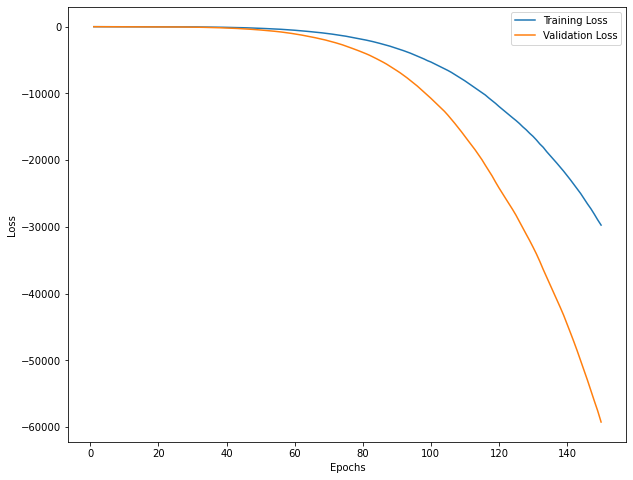

In [17]:
# Loss Graph

plt.figure(figsize= (10, 8))

epochs_range = range(1, epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label= 'Training Loss')
plt.plot(epochs_range, val_loss, label= 'Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [18]:
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)

print('x_test.shape', x_test.shape)
print('y_test.shape', y_test)


# Make a prediction
test_data = [[242.0,23.2,25.4,30.0,11.5200,4.0200]]
test = pd.Series(test_data)
test
print(test.shape)
model.predict(x_test)

x_train.shape (127, 6)
y_train.shape (127,)
x_test.shape (32, 6)
y_test.shape 41     4
43     4
108    2
49     4
64     1
156    5
150    5
22     0
56     6
142    3
39     4
44     4
26     0
133    3
40     4
102    2
111    2
151    5
135    3
47     4
122    2
127    2
132    3
36     4
96     2
33     0
28     0
126    2
78     2
30     0
146    5
110    2
Name: Species, dtype: int64
(1,)


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

## Logistic Regression

In [52]:
# Creating the Logistic Regression model
logReg = LogisticRegression()

logReg.fit(x_train, y_train)

LogisticRegression()

In [53]:
# Check the score of the model
logReg.score(x_test,y_test)

0.75

In [68]:
# Evaluating the Logistic Regression Model
from sklearn.metrics import accuracy_score

logi_pred = logReg.predict(x_test)
acc_logisreg = accuracy_score(y_test, logi_pred)
print('Accuracy of the model is ', acc_logisreg*100, "%")

Accuracy of the model is  75.0 %


# Save the model

In [58]:
import pickle

# save the model
pickle.dump(logReg, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [59]:
# load the model
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))


In [60]:
# use model to predict
y_pred = model.predict(scaler.fit_transform(x_test))

In [61]:
y_pred

array(['Perch', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Pike', 'Pike', 'Perch', 'Parkki', 'Bream', 'Bream',
       'Perch', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Bream',
       'Bream', 'Perch', 'Perch', 'Perch', 'Perch', 'Smelt', 'Perch',
       'Parkki', 'Perch', 'Perch', 'Parkki'], dtype=object)

In [63]:
test_data = [[242.0,23.2,25.4,30.0,11.5200,4.0200]]
model.predict(scaler.fit_transform(test_data))

array(['Perch'], dtype=object)